In [66]:
import geopandas as gpd
import pandas as pd
import glob
from geospatial_functions import get_background_map 
import matplotlib.pyplot as plt
import rasterio
from rasterio.plot import show as rioshow

In [2]:
files = glob.glob("*.gpkg")

“Bomen in Nederland” (“Trees in the Netherlands”) dataset created by the [Dutch Institute for Public Health and Environment](https://www.atlasleefomgeving.nl/kaarten).

This is a subset

In [27]:
gdf = gpd.read_file(files[0]).set_crs('EPSG:28992')
gdf_4326 = gdf.to_crs('EPSG:4326')

In [28]:
gdf.head(2)

,OBJECTID,uuid,runnummer,id,Surface,shadowlength,geometry
0,326,75fd81be-dac6-41d7-bbff-e25e876cd897,388,326,51,3.563722,"MULTIPOLYGON (((84367.250 443211.250, 84368.00..."
1,351,00678945-849e-4da6-9aba-b1c40604cb67,388,351,34,3.504818,"MULTIPOLYGON (((84388.000 443216.250, 84388.75..."


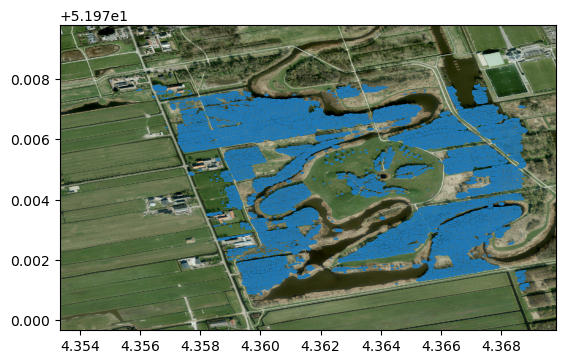

In [30]:
fig, ax = plt.subplots(1)

gdf_4326.plot(ax=ax)

bounds_precip_measurements = (ax.get_xlim()[0], ax.get_ylim()[0], ax.get_xlim()[1], ax.get_ylim()[1])
with rasterio.open(get_background_map("background_trees", bounds_precip_measurements)) as r:
    rioshow(r, ax=ax)    

<Axes: >

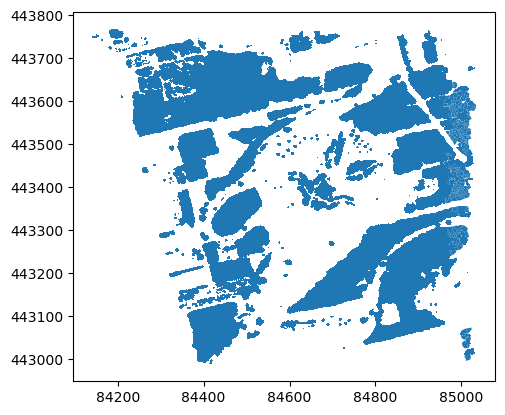

In [38]:
gdf.plot()

Using:

In [48]:
gpd.GeoSeries.translate

<function geopandas.base.GeoPandasBase.translate(self, xoff=0.0, yoff=0.0, zoff=0.0)>

For one section

<Axes: >

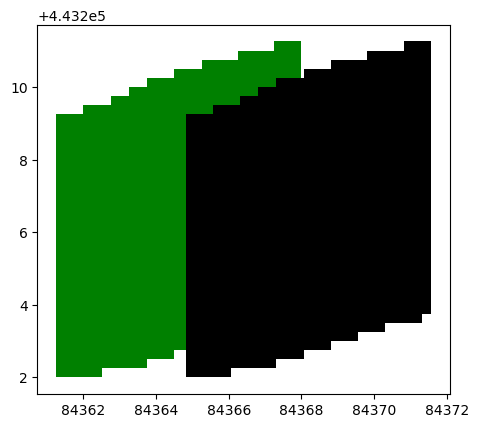

In [60]:
index = 0
gs = gpd.GeoSeries(data=gdf.iloc[index].geometry)
output = gs.translate(yoff=0, xoff=gdf.iloc[index].shadowlength) # positive xoff = eastern shaddow

fig, ax = plt.subplots(1)
gs.plot(ax=ax,color="green")
output.plot(ax=ax, color="black")

In [67]:
lst_geoseries = []
for index in range(len(gdf)):
    gs = gpd.GeoSeries(data=gdf.iloc[index].geometry)
    output = gs.translate(yoff=0, xoff=gdf.iloc[index].shadowlength) # positive xoff = eastern shaddow
    lst_geoseries.append(output)

In [76]:
gs_combined = pd.concat(lst_geoseries)
gdf_output = gpd.GeoDataFrame(geometry=gs_combined)

In [79]:
gdf_output.reset_index().drop(columns="index",inplace=True)

<Axes: >

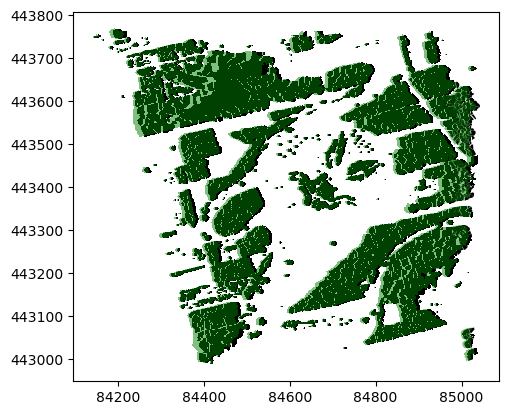

In [82]:
fig, ax = plt.subplots(1)
gdf.plot(ax=ax,color="green",alpha=0.5)
gdf_output.plot(ax=ax, color="black",zorder=-1)